In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data = pd.read_csv('TCS.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 0 to 4693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4687 non-null   datetime64[ns]
 1   Open    4687 non-null   float64       
 2   High    4687 non-null   float64       
 3   Low     4687 non-null   float64       
 4   Close   4687 non-null   float64       
 5   Volume  4687 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 256.3 KB


In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,166.932495,169.587494,166.932495,169.157501,4734168.0
1,2005-01-04,168.750000,169.250000,166.645004,167.657501,4979104.0
2,2005-01-05,167.524994,167.524994,160.037506,165.625000,9604320.0
3,2005-01-06,165.000000,168.250000,161.562500,165.057495,8006888.0
4,2005-01-07,166.250000,168.125000,164.082504,167.494995,7623136.0


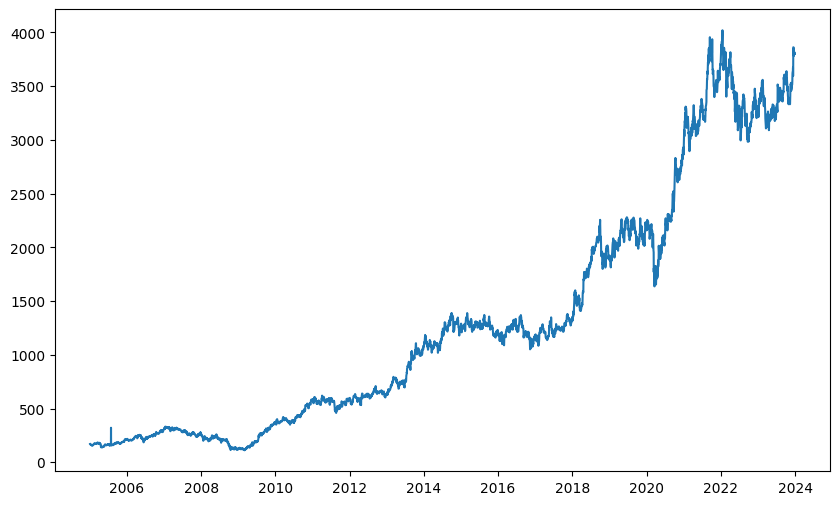

In [6]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.show()

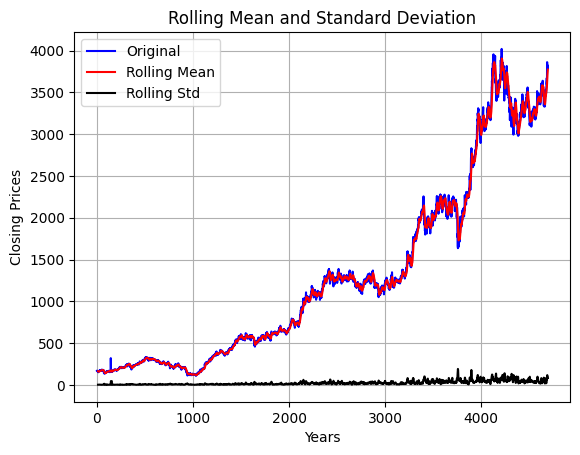

Results of dickey fuller test
Test Statistics                   1.193544
p-value                           0.995941
No. of lags used                 31.000000
Number of observations used    4655.000000
critical value (1%)              -3.431756
critical value (5%)              -2.862161
critical value (10%)             -2.567101
dtype: float64


In [7]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.grid(True)
    plt.xlabel('Years')
    plt.ylabel('Closing Prices')

    
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['Close'])

<Figure size 640x480 with 0 Axes>

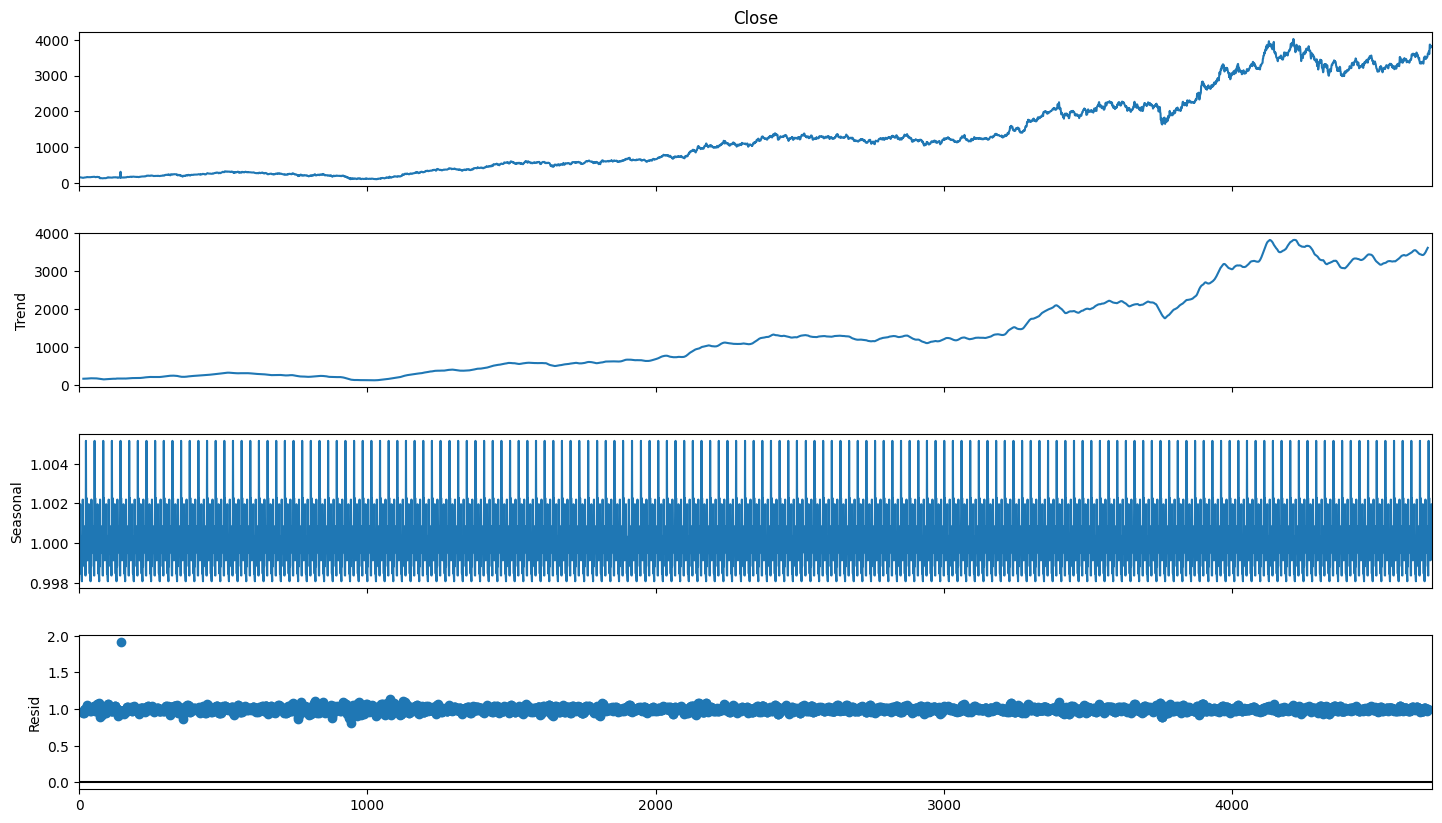

In [13]:
result = seasonal_decompose(data['Close'], model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


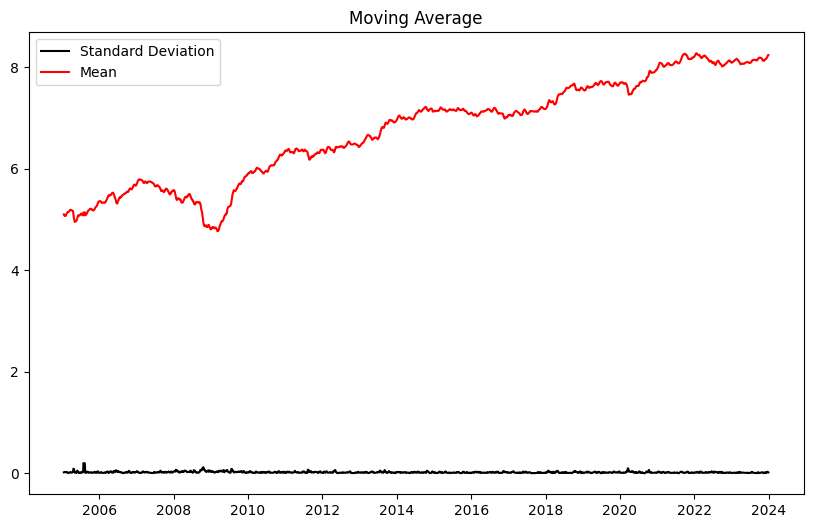

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [21]:
len(data)

4687

In [21]:
row = int(len(df_log)*0.9)
train_data = list(df_log[:row])
test_data = list(df_log[row:])
print(train_data[:10] ,len(train_data))
print(test_data[:10], len(test_data))

[5.130830239499186, 5.121923213933413, 5.109726196740486, 5.10629386774985, 5.120953470221672, 5.111581049022808, 5.101206998370035, 5.089184622618641, 5.085201513143592, 5.087904948100361] 4218
[8.246669705366472, 8.237214703349489, 8.227762912007439, 8.232320515312315, 8.234923140321426, 8.214722288229673, 8.22516836953032, 8.247429632301419, 8.24619781128325, 8.238589769949085] 469


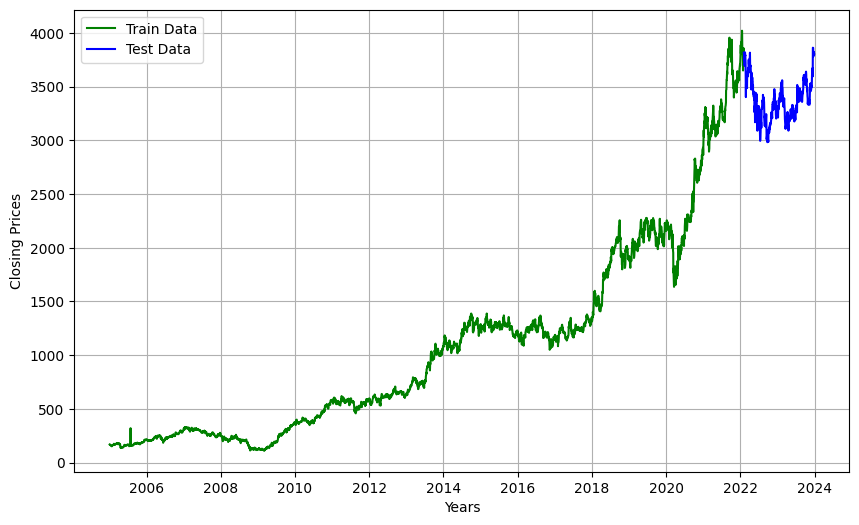

In [23]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data[0:row]['Date'],data[0:row]['Close'], 'green', label='Train Data')
plt.plot(data[row:]['Date'],data[row:]['Close'], 'blue', label='Test Data')
plt.legend()

In [22]:
model_predictions = []
n_test_obser = len(test_data)
print(train_data[:10])
print(test_data[:10])

[5.130830239499186, 5.121923213933413, 5.109726196740486, 5.10629386774985, 5.120953470221672, 5.111581049022808, 5.101206998370035, 5.089184622618641, 5.085201513143592, 5.087904948100361]
[8.246669705366472, 8.237214703349489, 8.227762912007439, 8.232320515312315, 8.234923140321426, 8.214722288229673, 8.22516836953032, 8.247429632301419, 8.24619781128325, 8.238589769949085]


In [23]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(train_data, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19476.503, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19287.763, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19431.686, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19459.167, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19285.944, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-19478.286, Time=1.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-19476.686, Time=1.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19480.514, Time=0.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-19477.002, Time=1.90 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-19462.468, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-19474.327, Time=0.70 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 12.414 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observat

In [26]:
for i in range(n_test_obser):
    model = ARIMA(train_data, order=(2, 1, 4))  #p,d,q
    
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    model_predictions.append(output)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

[3827.81710392]
[3815.11748671]
[3779.17589486]
[3750.45627857]
[3755.35834349]
[3775.97510447]
[3692.4248229]
[3734.18766286]
[3820.49185573]
[3803.76490145]
[3786.82200712]
[3795.29243714]
[3717.94210544]
[3595.04898039]
[3566.6860969]
[3407.78476796]
[3523.77399083]
[3549.48881817]
[3548.82038708]
[3535.8388589]
[3533.69560627]
[3480.31989377]
[3600.94782113]
[3627.53104383]
[3618.36234148]
[3598.42579258]
[3643.94493146]
[3593.85167945]
[3654.83622946]
[3669.59968252]
[3629.53929072]
[3698.32809509]
[3708.05660791]
[3752.0082477]
[3705.05223085]
[3706.75656196]
[3707.71208269]
[3733.00061149]
[3735.56928632]
[3757.84613129]
[3771.78254217]
[3811.94659845]
[3753.41728583]
[3689.51220494]
[3688.17653462]
[3696.32377317]
[3692.51845112]
[3662.17030638]
[3530.75402263]
[3478.72287722]
[3558.93706622]
[3626.08997651]
[3609.02162727]
[3546.44125107]
[3549.92411329]
[3564.2659707]
[3582.29286944]
[3544.10398246]
[3545.77735135]
[3482.52607367]
[3520.56118679]
[3436.7977648]
[3444.54554529

In [27]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4686
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -21711.441
Date:                Thu, 16 May 2024   AIC                          43436.882
Time:                        18:22:31   BIC                          43482.047
Sample:                             0   HQIC                         43452.764
                               - 4686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0085      0.001      7.845      0.000       0.006       0.011
ar.L2         -0.9985      0.001   -982.123      0.000      -1.001      -0.997
ma.L1         -0.0243      0.008     -2.963      0.0

In [28]:
len(model_predictions)

469

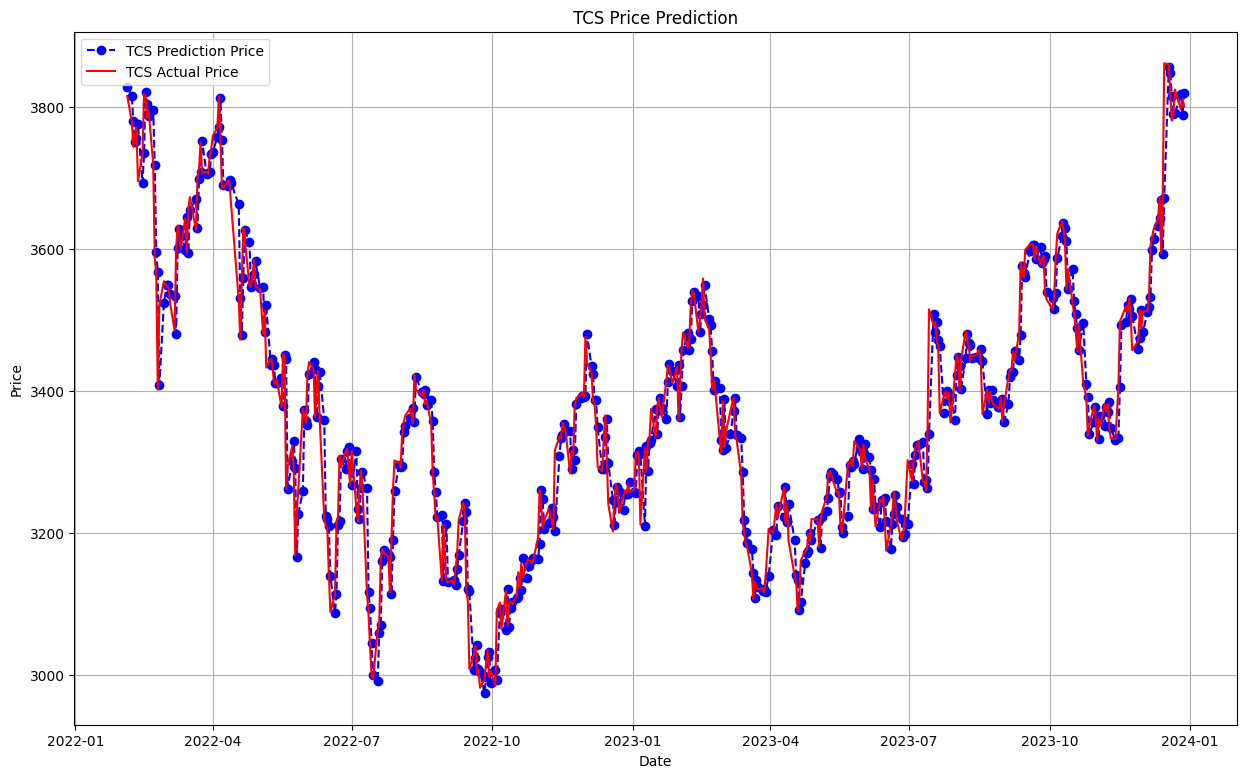

In [29]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[row:].Date
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'TCS Prediction Price')
plt.plot(date_range, test_data, color = 'red', label = 'TCS Actual Price')

plt.title('TCS Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [30]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ',(mape))
print('Accuracy: ', (100-(mape*100)))

MAPE:  0.06311240710490014
Accuracy:  93.68875928950999
